# Task 1

Implement a user-defined distance function: Use “distance_cw2” as the function name. The function should calculate the distance between two give instances/records. The function takes two one-dimensional numpy arrays and returns a distance.
def distance_cw2(x, y):
Your function will calculate the Euclidean distance using m random attributes each time it is called. Use m=3.

In [34]:
# Import the libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [35]:
#Import the dataset

df = pd.read_csv("task1_diabetes.txt")
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# train the scaler on the diabetes data
scaler.fit(df.drop('class',axis=1))

# scale the diabetes data
scaled_features = scaler.transform(df.drop('class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [37]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test with 30% as test data
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['class'], test_size=0.30)

In [38]:
import math
import random

# User defined Euclidean distance function
def distance_cw2(x,y):
    m=3
    attribute = random.sample(range(len(x)), m)
    x = x[attribute]
    y = y[attribute]
    s = 0
    for a,b in zip(x,y):
        s += (a-b)**2
    return math.sqrt(s)

Use KNeighborsClassifier to evaluate the performance of your function against the following built-in distance functions:

o Euclidean
o Manhattan
o Chebyshev

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Creating the classifier for all 4(euclidean, manhattan, chebyshev, distance_cw2) distance functions

knn1 = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn2 = KNeighborsClassifier(n_neighbors=10, metric='manhattan')
knn3 = KNeighborsClassifier(n_neighbors=10, metric='chebyshev')
knn4 = KNeighborsClassifier(n_neighbors=10, algorithm='auto', metric= lambda a, b: distance_cw2(a, b))

# Training the data for all 4((euclidean, manhattan, chebyshev, distance_cw2)) distance functions

knn1.fit(X_train,y_train)
knn2.fit(X_train,y_train)
knn3.fit(X_train,y_train)
knn4.fit(X_train,y_train)

pred1 = knn1.predict(X_test)
pred2 = knn2.predict(X_test)
pred3 = knn3.predict(X_test)
pred4 = knn4.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Calculating the accuracy score and confusion matrix for KNN using "Eucledian" distance function

print("The confusion matrix for KNN using 'Euclidean distance' is \n", confusion_matrix(y_test,pred1))
print("\nThe accuracy score is : ", accuracy_score(y_test, pred1))

The confusion matrix for KNN using 'Euclidean distance' is 
 [[138  14]
 [ 47  32]]

The accuracy score is :  0.7359307359307359


In [41]:
# Calculating the accuracy score and confusion matrix for KNN using "Manhattan" distance function

print("The confusion matrix for KNN using 'Manhattan distance' is \n", confusion_matrix(y_test,pred2))
print("\nThe accuracy score is : ", accuracy_score(y_test, pred2))

The confusion matrix for KNN using 'Manhattan distance' is 
 [[138  14]
 [ 45  34]]

The accuracy score is :  0.7445887445887446


In [42]:
# Calculating the accuracy score and confusion matrix for KNN using "Chebyshev" distance function

print("The confusion matrix for KNN using 'Chebyshev distance' is \n", confusion_matrix(y_test,pred3))
print("\nThe accuracy score is : ", accuracy_score(y_test, pred3))

The confusion matrix for KNN using 'Chebyshev distance' is 
 [[139  13]
 [ 51  28]]

The accuracy score is :  0.7229437229437229


In [43]:
# Calculating the accuracy score and confusion matrix for KNN using "distance_cw2" distance function

print("The confusion matrix for KNN using 'distance_cw2 distance' is \n", confusion_matrix(y_test,pred4))
print("\nThe accuracy score is : ", accuracy_score(y_test, pred4))

The confusion matrix for KNN using 'distance_cw2 distance' is 
 [[143   9]
 [ 66  13]]

The accuracy score is :  0.6753246753246753


You should use n-fold cross-validation (where n=10). Show the results for each fold, the overall average and 
the standard deviation using relevant evaluation measures. You are expected to use sklearn.model_selection.KFold 
(i.e. don’t use cross_validate).

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# Making 10 splits using KFold
kfold= KFold(n_splits=10)

In [12]:
# KNN using built-in function: Eucledian
d_accuracy1 = {}
avg1 = {}
std1 = {}

# Running the first loop for different k values of 1, 3, 5 and 7

for i in (1,3,5,7):
    accuracy1 = []
    
    # Running the second loop for the 10 splits for each k value
    
    for train_index, test_index in kfold.split(df_feat):
        # Spilitting the data as per train and test indexes
        X_train, X_test = scaled_features[train_index], scaled_features[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        knn = KNeighborsClassifier(n_neighbors=i , metric='euclidean')
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        accuracy1.append(accuracy_score(y_test, pred))
    d_accuracy1[i] = accuracy1
    # mean of the accuracy results for 10 splits and one k value
    avg1[i] = np.mean(accuracy1)
    
    # Standard Deviation of the accuracy results for 10 splits and one k value
    std1[i] = np.std(accuracy1)
    

print("The average accuracy after 10 fold experiments for neighbor 1, 3 ,5 and 7 using euclidean are respectively")
print(avg1[1], "\n" , avg1[3], "\n", avg1[5], "\n", avg1[7])
print("\nThe average standard deviation after 10 fold experiments for neighbor 1, 3 ,5 and 7 using euclidean are respectively")
print(std1[1], "\n" , std1[3], "\n", std1[5], "\n", std1[7])

The average accuracy after 10 fold experiments for neighbor 1, 3 ,5 and 7 using euclidean are respectively
0.708321941216678 
 0.7460526315789474 
 0.7421394395078604 
 0.7421394395078604

The average standard deviation after 10 fold experiments for neighbor 1, 3 ,5 and 7 using euclidean are respectively
0.05432698487217694 
 0.06596922873532288 
 0.0714995461187472 
 0.06836419076345646


In [13]:
# KNN using built-in function: manhattan
d_accuracy2 = {}
avg2 = {}
std2 = {}

# Running the first loop for different k values of 1, 3, 5 and 7

for i in (1,3,5,7):
    accuracy2 = []
    
    # Running the second loop for the 10 splits for each k value
    
    for train_index, test_index in kfold.split(df_feat):
        # Spilitting the data as per train and test indexes
        X_train, X_test = scaled_features[train_index], scaled_features[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        accuracy2.append(accuracy_score(y_test, pred))
    d_accuracy2[i] = accuracy2
    # mean of the accuracy results for 10 splits and one k value
    avg2[i] = np.mean(accuracy2)
    # Standard Deviation of the accuracy results for 10 splits and one k value
    std2[i] = np.std(accuracy2)
    
print("The average accuracy after 10 fold experiments for neighbor 1, 3 ,5 and 7 using euclidean are respectively")
print(avg2[1], "\n" , avg2[3], "\n", avg2[5], "\n", avg2[7])
print("\nThe average standard deviation after 10 fold experiments for neighbor 1, 3 ,5 and 7 using euclidean are respectively")
print(std2[1], "\n" , std2[3], "\n", std2[5], "\n", std2[7])


The average accuracy after 10 fold experiments for neighbor 1, 3 ,5 and 7 using euclidean are respectively
0.6940704032809297 
 0.7213943950786057 
 0.7329630895420369 
 0.7395078605604921

The average standard deviation after 10 fold experiments for neighbor 1, 3 ,5 and 7 using euclidean are respectively
0.04287954308905264 
 0.0690989763077722 
 0.06550100760458857 
 0.07259378536812883


In [14]:
avg2

{1: 0.6940704032809297,
 3: 0.7213943950786057,
 5: 0.7329630895420369,
 7: 0.7395078605604921}

In [15]:
# KNN using built-in function: chebyshev
d_accuracy3 = {}
avg3 = {}
std3 = {}

# Running the first loop for different k values of 1, 3, 5 and 7

for i in (1,3,5,7):
    accuracy3 = []
    
    # Running the second loop for the 10 splits for each k value
    
    for train_index, test_index in kfold.split(df_feat):
        # Spilitting the data as per train and test indexes
        X_train, X_test = scaled_features[train_index], scaled_features[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        knn = KNeighborsClassifier(n_neighbors=i, metric='chebyshev')
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        accuracy3.append(accuracy_score(y_test, pred))
    d_accuracy3[i] = accuracy3
    # mean of the accuracy results for 10 splits and one k value
    avg3[i] = np.mean(accuracy3)
    # Stanadard Deviation of the accuracy results for 10 splits and one k value
    std3[i] = np.std(accuracy3)
    
print("The average accuracy after 10 fold experiments for neighbor 1, 3 ,5 and 7 using euclidean are respectively")
print(avg3[1], "\n" , avg3[3], "\n", avg3[5], "\n", avg3[7])
print("\nThe average standard deviation after 10 fold experiments for neighbor 1, 3 ,5 and 7 using euclidean are respectively")
print(std3[1], "\n" , std3[3], "\n", std3[5], "\n", std3[7])
print(avg3)

The average accuracy after 10 fold experiments for neighbor 1, 3 ,5 and 7 using euclidean are respectively
0.6940362269309638 
 0.7356117566643883 
 0.7369958988380042 
 0.7330656185919343

The average standard deviation after 10 fold experiments for neighbor 1, 3 ,5 and 7 using euclidean are respectively
0.04855599734500574 
 0.05664712222733842 
 0.06737069929295829 
 0.06450972552110787
{1: 0.6940362269309638, 3: 0.7356117566643883, 5: 0.7369958988380042, 7: 0.7330656185919343}


In [16]:
# KNN using defined function: distance_cw2
d_accuracy4 = {}
avg4 = {}
std4 = {}

# Running the first loop for different k values of 1, 3, 5 and 7

for i in (1,3,5,7):
    accuracy4 = []
    
    # Running the second loop for the 10 splits for each k value
    
    for train_index, test_index in kfold.split(df_feat):
        # Spilitting the data as per train and test indexes
        X_train, X_test = scaled_features[train_index], scaled_features[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        knn = KNeighborsClassifier(n_neighbors=10, algorithm='auto', metric= lambda a, b: distance_cw2(a, b))
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        accuracy4.append(accuracy_score(y_test, pred))
    d_accuracy4[i] = accuracy4
    # mean of the accuracy results for 10 splits and one k value
    avg4[i] = np.mean(accuracy4)
    # Stanadard Deviation of the accuracy results for 10 splits and one k value
    std4[i] = np.std(accuracy4)
    
print("The average accuracy after 10 fold experiments for neighbor 1, 3 ,5 and 7 using euclidean are respectively")
print(avg4[1], "\n" , avg4[3], "\n", avg4[5], "\n", avg4[7])
print("\nThe average standard deviation after 10 fold experiments for neighbor 1, 3 ,5 and 7 using euclidean are respectively")
print(std4[1], "\n" , std4[3], "\n", std4[5], "\n", std4[7])

The average accuracy after 10 fold experiments for neighbor 1, 3 ,5 and 7 using euclidean are respectively
0.6979152426520848 
 0.6770505809979495 
 0.6874743677375257 
 0.6574846206425152

The average standard deviation after 10 fold experiments for neighbor 1, 3 ,5 and 7 using euclidean are respectively
0.050215328566303605 
 0.053678766685313975 
 0.05430128645417109 
 0.07356605997221692


In [17]:
d = {'eucledian': avg1, 'manhattan': avg2, 'chebyshev': avg3, 'distance_cw2': avg4}
df = pd.DataFrame(d, index = (1,3,5,7)) 
print(df)

   eucledian  manhattan  chebyshev  distance_cw2
1   0.708322   0.694070   0.694036      0.697915
3   0.746053   0.721394   0.735612      0.677051
5   0.742139   0.732963   0.736996      0.687474
7   0.742139   0.739508   0.733066      0.657485


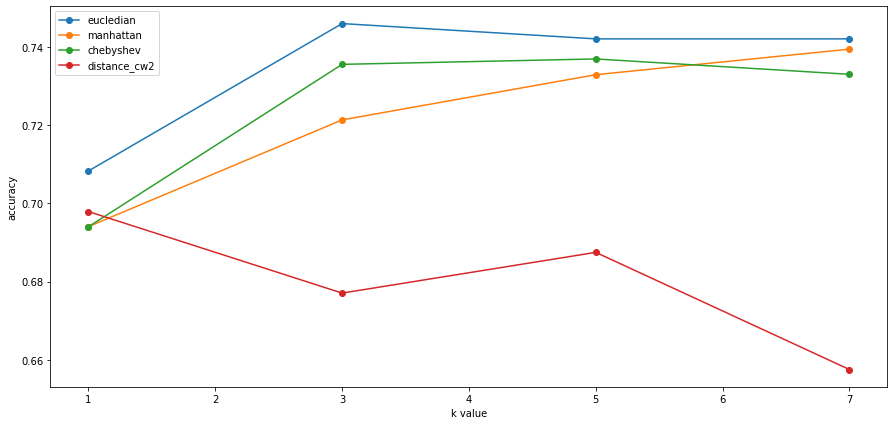

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(15,7)
                         
axes.plot((1,3,5,7), df['eucledian'], label = 'eucledian', marker = 'o')
axes.plot((1,3,5,7), df['manhattan'], label = 'manhattan', marker = 'o')
axes.plot((1,3,5,7), df['chebyshev'], label = 'chebyshev', marker = 'o')
axes.plot((1,3,5,7), df['distance_cw2'], label = 'distance_cw2', marker = 'o')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.legend()
plt.show()

   ## Taks 2
   In this task you are expected to compare the performance of KNN, Decision Tress (DT) and Neural Networks (TT) when dealing with noisy data.
   

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [21]:
from sklearn.preprocessing import StandardScaler

# Import the training and test datasets

df_train = pd.read_csv("task2_train.txt")
df_test = pd.read_csv("task2_test.txt")

# Standardadising the data with standardscaler 

scaler = StandardScaler()
scaler.fit(df_train.drop('class',axis=1))
scaled_features = scaler.transform(df_train.drop('class',axis=1))
X_train = pd.DataFrame(scaled_features,columns=df_train.columns[:-1])
y_train = df_train.iloc[:,-1]

scaler = StandardScaler()
scaler.fit(df_test.drop('class',axis=1))
scaled_features = scaler.transform(df_test.drop('class',axis=1))
X_test = pd.DataFrame(scaled_features,columns=df_test.columns[:-1])
y_test = df_test.iloc[:,-1]


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

per = 0
lst = []
avgknn = {}
avgdt = {}
avgnn = {}

# Loop to extract the number of roows where to create noise randing from 0 to 30% with an increment of 2%

for i in range(16):
    num = int(len(X_train) * (per/100))
    per +=2
    lst.append(num)

# Loop to make noise for the respective percentage from 0% to 30%
    
for j in lst:
    lstknn  = []
    lstdt = []
    lstnn = []
    
    # Loop to run the experiement 50 times
    
    for k in range(50): 
        # Copying the training data where we would create noise
        traindata = y_train.copy()
        np.random.seed(k)
        # Extracting the random indexes where we need to create noise
        rand = np.random.randint(len(traindata), size = j)
        # Reverting the labels in the data from 0 to 1 and from 1 to 0
        traindata[rand] = 1 - traindata[rand]  
        
        # Creating the KNN classifier with 5 neighbors and "distance" weight paramenters
        knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
        # Training the data
        knn.fit(X_train,traindata)
        pred = knn.predict(X_test)
        # Storing the accuracy score for all 50 experiments
        lstknn.append(metrics.accuracy_score(y_test, pred))

        # Creating the DecisionTreeClassifier
        classifier_model = DecisionTreeClassifier()
        # Training the data
        classifier_model = classifier_model.fit(X_train, traindata)
        pred = classifier_model.predict(X_test)
         # Storing the accuracy score for all 50 experiments
        lstdt.append(metrics.accuracy_score(y_test, pred))

        # Creating the MLP classifier
        clf = MLPClassifier(hidden_layer_sizes=(8,3), max_iter = 2000)
        clf.fit(X_train,traindata)
         # Storing the accuracy score for all 50 experiments
        lstnn.append(metrics.accuracy_score(y_test, clf.predict(X_test)))
        
    avgknn[j] = np.mean(lstknn)
    avgdt[j] = np.mean(lstdt)
    avgnn[j] = np.mean(lstnn)

In [24]:
df2 = pd.DataFrame(zip(avgknn.values(), avgdt.values(), avgnn.values()), index=range(0,31,2), columns=('KNN', 'DT', 'NN') )
print(df2)

         KNN        DT        NN
0   0.593220  0.713220  0.660678
2   0.595932  0.668814  0.678644
4   0.591864  0.642034  0.666780
6   0.592203  0.636610  0.663390
8   0.590508  0.619322  0.663051
10  0.586441  0.620000  0.660339
12  0.583051  0.595593  0.658983
14  0.582034  0.591525  0.654237
16  0.582373  0.595593  0.647797
18  0.578305  0.584746  0.640339
20  0.578983  0.572203  0.646780
22  0.574576  0.569153  0.640339
24  0.572542  0.566102  0.637627
26  0.573559  0.558305  0.640000
28  0.569153  0.567458  0.628814
30  0.564407  0.553220  0.629492


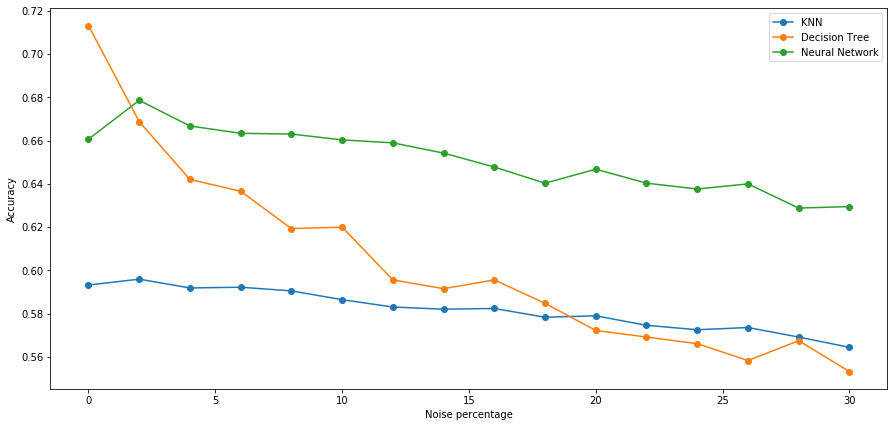

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(15,7))
axes.plot(range(0,31,2), df2['KNN'], label = 'KNN', marker = 'o')
axes.plot(range(0,31,2), df2['DT'], label = 'Decision Tree', marker = 'o')
axes.plot(range(0,31,2), df2['NN'], label = 'Neural Network', marker = 'o')
plt.xlabel("Noise percentage")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


   ## Taks 3 [Justification]

Write 400 words (maximum) reflection on the results. You are expected to cover the following:
• Interpretation/explanation of the experiments and results in Task 1 and Task 2.
• Divide your reflection to two subsections (Task 1 and Task 2).
• Reflection on the results, advantages and limitation of the methods used.
• Possible improvements.

# Answer

In Task 1, we have defined our own function “distance_cw2” and with the help of that tested the accuracy of prediction using KNN along with other distance functions like “Eucledian”, “Manhattan” and “Chebyshev”. We have used 10 fold cross validation of the data with k values of 1, 3, 5 and 7. In this experiment we noticed that the accuracy for all 4 distance functions were almost same at k=1 and then increased for “Chebyshev”, “Eucledian” and “Manhattan” whereas reduced for “distance_cw2” at k=3, then at k=5 and 7 the accuracy went down after slight improvement at k=5. With the first 3 distance functions the accuracy almost remained same or increased a little after k=3.

In Task 2, we generated noise from 0%-30% with increment of 2% in the training data and we tested with the test data with a repetition of 50 times and evaluated the performance of KNN, DT and NN. In the experiment we have noticed that with increased noise the accuracy have been reduced for all 3 algorithms, however, with increased noise the algorithm whose accuracy had been affected most is “Decision Tree” whereas the accuracy of “Neural Network” and “KNN” had been reduced by little. 

From these experiments we can say that as per task 1 we have good results for “Chebyshev”, “Eucledian” and “Manhattan” with increased k values whereas user defined function did not perform well compared to other functions. So, in this scenario we can use any of the default distance functions. In Task 2 , we noticed that noisy data does not affect much the Neural Network alogorithms, hence using the same while processing a noisy data would prove better accuracy. It looks Decision Tree has some limitation while processing the noisy data and hence should be avoided in such scenario.

We could do the test by taking some of k values in Task 1 to see the optimum k value of each algorithm and to see if the accuracy increases further. 
